In [25]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import statsmodels.api as sm
import seaborn as sns
import itertools
from ipywidgets import interact, interactive
import re
import hashlib
sns.set(style="dark")
plt.style.use("ggplot")
%matplotlib inline

In [66]:
copd = pd.read_csv("chronic_obstructive_pulmonary_disease.csv")
state_populations = pd.read_csv("pop.csv")

In [67]:
copd_gender = copd[copd['StratificationCategoryID1'] == 'RACE']

In [44]:
# copd_bystate = copd_gender.groupby('LocationAbbr').count().reset_index()
# copd_bystate = copd_bystate.rename(columns={"LocationAbbr": "STATE", "Topic": "NUM OF COPD CASES"})

In [68]:
copd_gender = copd_gender.rename(columns={"LocationAbbr": "STATE", "Topic": "NUM OF COPD CASES"})

In [69]:
copd_gender = copd_gender[['STATE','NUM OF COPD CASES', 'StratificationID1']].groupby(['StratificationID1', 'STATE']).count().reset_index()

In [71]:
state_populations.columns = ["Geographic Area", "April 1 2020", "2020", "2021", "2022", "2023"]
state_populations = state_populations.iloc[8:-8].reset_index()
state_populations = state_populations[["Geographic Area", "2023"]]

In [72]:
state_populations['Geographic Area'] = state_populations['Geographic Area'].str.extract(pat = '([\w ]+)')
state_populations['2023'] = state_populations['2023'].replace(',','',regex=True).tolist()
state_populations['2023'] = pd.to_numeric(state_populations['2023'])
state_populations = state_populations.rename(columns={"Geographic Area": "State"})

In [73]:
states = pd.read_csv("states.csv")

In [47]:
# states = states.rename(columns={"Abbreviation": "STATE"})
# combined_df = pd.merge(states, copd_bystate, on="STATE", how="inner")
# combined_df = pd.merge(combined_df, state_populations, on='State', how='inner')
# combined_df.head()

In [74]:
states = states.rename(columns={"Abbreviation": "STATE"})
combined_gendata = pd.merge(states, copd_gender, on="STATE", how="inner")
combined_df = pd.merge(combined_gendata, state_populations, on='State', how='inner')
combined_df.head()

,State,STATE,StratificationID1,NUM OF COPD CASES,2023
0,Alabama,AL,AIAN,192,5108468
1,Alabama,AL,API,192,5108468
2,Alabama,AL,BLK,348,5108468
3,Alabama,AL,HIS,348,5108468
4,Alabama,AL,MRC,156,5108468


In [75]:
combined_df['copd/population'] = combined_df['NUM OF COPD CASES'] / combined_df['2023']

In [76]:
combined_df

,State,STATE,StratificationID1,NUM OF COPD CASES,2023,copd/population
0,Alabama,AL,AIAN,192,5108468,0.000038
1,Alabama,AL,API,192,5108468,0.000038
2,Alabama,AL,BLK,348,5108468,0.000068
3,Alabama,AL,HIS,348,5108468,0.000068
4,Alabama,AL,MRC,156,5108468,0.000031
...,...,...,...,...,...,...
352,Wyoming,WY,BLK,348,584057,0.000596
353,Wyoming,WY,HIS,348,584057,0.000596
354,Wyoming,WY,MRC,156,584057,0.000267
355,Wyoming,WY,OTH,156,584057,0.000267


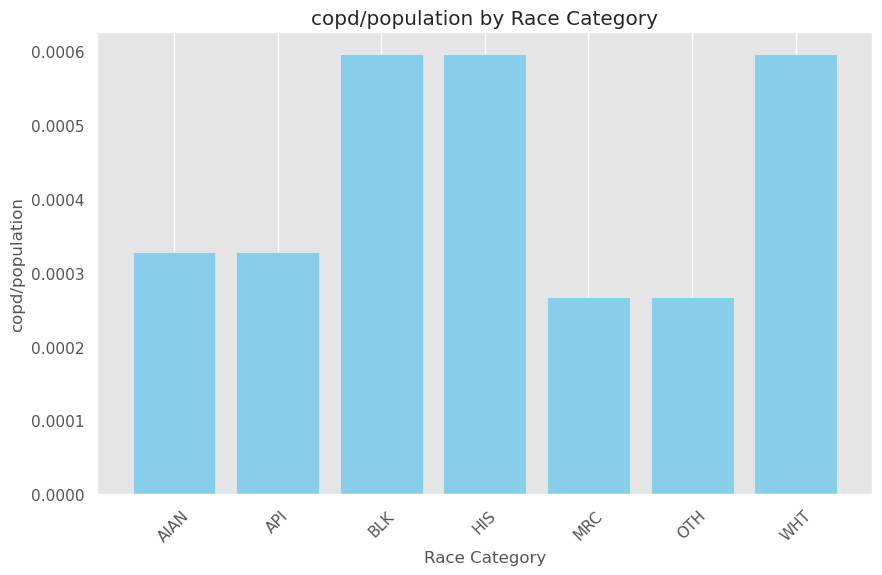

In [77]:
plt.figure(figsize=(10, 6))
plt.bar(combined_df['StratificationID1'], combined_df['copd/population'], color='skyblue')
plt.xlabel('Race Category')
plt.ylabel('copd/population')
plt.title('copd/population by Race Category')
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.grid(axis='y')  # Add gridlines on the y-axis
plt.show()

**Describe trends.**

Black and Hispanic show the highest copd/population percentage, which means that some of the variances between COPD cases by states could be explained by external factors like racial backgrounds, and thus, race should be considered as one of the variables used to construct our bayesian model. 

**How this visualization support our RQ.**

There is a spike in the percentage for BLK, HIS, and WHT, which again 